In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [5]:
# Loading IRIS dataset
iris = datasets.load_iris(as_frame=True)
df = iris.frame
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
8,4.4,2.9,1.4,0.2,0
40,5.0,3.5,1.3,0.3,0
125,7.2,3.2,6.0,1.8,2
55,5.7,2.8,4.5,1.3,1
65,6.7,3.1,4.4,1.4,1
109,7.2,3.6,6.1,2.5,2
27,5.2,3.5,1.5,0.2,0
30,4.8,3.1,1.6,0.2,0
62,6.0,2.2,4.0,1.0,1
3,4.6,3.1,1.5,0.2,0


In [6]:
# Z-score function
def z_score(array):
    mean = np.mean(array)
    sigma = np.std(array, ddof=1)
    return (array - mean) / sigma

In [7]:
# Add z-score columns
df['sl_z'] = z_score(df['sepal length (cm)'].values)
df['sw_z'] = z_score(df['sepal width (cm)'].values)

In [8]:
# sepal length parametrs
sl_list = df['sepal length (cm)'].values.tolist()
sl_array = df['sepal length (cm)'].values
sl_frame = df['sepal length (cm)']

# sepal width parameters
sw_list = df['sepal width (cm)'].values.tolist()
sw_array = df['sepal width (cm)'].values
sw_frame = df['sepal width (cm)']

In [9]:
def calculate_covariance(sl_list, sw_list):
  if len(sl_list) != len(sw_list):
    raise ValueError("lists X1 and X2 must have the same length")

  n = len(sl_list)
  mean_sl = sum(sl_list) / n
  mean_sw = sum(sw_list) / n

  covariance = sum((sl_list[i] - mean_sl) * (sw_list[i] - mean_sw)  for i in range(n)) /n

  return covariance

calculate_covariance(sl_list, sw_list)

-0.04215111111111109

In [10]:
def calculate_correlation(X1, X2):
  if len(X1) != len(X2):
    raise ValueError("lists X1 and X2 mast have the length")

  n = len(X1)
  mean_X1 = sum(X1) / n
  mean_X2 = sum(X2) / n

  # calculate covariance

  cov = sum((X1[i] - mean_X1) * (X2[i] - mean_X2) for i in range(n)) / n

  # calculate corelation coefficient (std)
  std_X1 = (sum((xi - mean_X1) ** 2 for xi in X1) / n) ** 0.5
  std_X2 = (sum ((xi - mean_X2) ** 2 for xi in X2) / n) ** 0.5

  # calculate the correlation coefficient
  if std_X1 == 0 or std_X2 == 0:
    raise ValueError("Standard deviation cannot be zero for correlation calculation.")

  correlation = cov / (std_X1 * std_X2)

  return correlation

calculate_correlation(sl_list, sw_list)

-0.11756978413300205

In [11]:
# dataframe corelation
df[['sepal length (cm)' , 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


PDF values for the sepal length data:
[0.32200588 0.25178867 0.18572654 0.15606028 0.28682488 0.41744843
 0.15606028 0.28682488 0.10546982 0.25178867 0.41744843 0.21783211
 0.21783211 0.08482926 0.48111665 0.47461229 0.41744843 0.32200588
 0.47461229 0.32200588 0.41744843 0.32200588 0.15606028 0.32200588
 0.21783211 0.28682488 0.28682488 0.35626826 0.35626826 0.18572654
 0.21783211 0.41744843 0.35626826 0.44209459 0.25178867 0.28682488
 0.44209459 0.25178867 0.10546982 0.32200588 0.28682488 0.1292341
 0.10546982 0.28682488 0.32200588 0.21783211 0.32200588 0.15606028
 0.38846939 0.28682488 0.18161945 0.38433694 0.21342967 0.44209459
 0.35179363 0.47461229 0.41381158 0.25178867 0.3173439  0.35626826
 0.28682488 0.48064911 0.47322998 0.45917972 0.46141734 0.28212312
 0.46141734 0.48111665 0.43909601 0.46141734 0.48064911 0.45917972
 0.41381158 0.45917972 0.38433694 0.3173439  0.24718013 0.28212312
 0.47322998 0.47461229 0.44209459 0.44209459 0.48111665 0.47322998
 0.41744843 0.47322998 0.

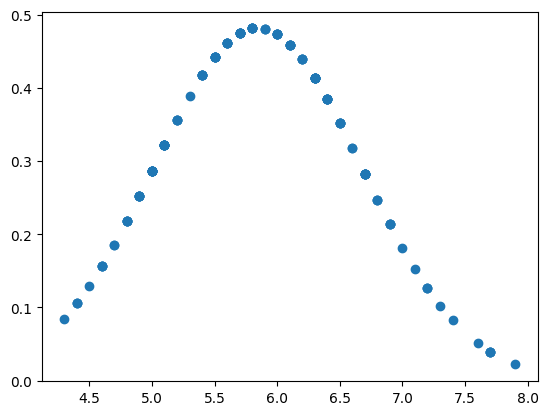

In [12]:
# Probability density function

def calculate_pdf_vectorized(data):
  mu = np.mean(data)  # Calculate the mean of the dataset
  sigma = np.std(data, ddof=1)
  coeff = 1 / (sigma * np.sqrt(2 * np.pi))

  exponent = np.exp(-((data -mu) ** 2) / (2 * sigma ** 2))

  return coeff * exponent

# Calculate the PDF for all data points in the sepal length array
pdf_values = calculate_pdf_vectorized(sl_array)

print("PDF values for the sepal length data:")
print(pdf_values)
plt.scatter(sl_array, pdf_values)


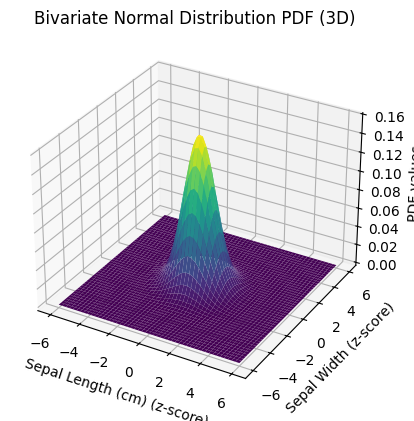

In [31]:
# Bivariate normal distribution




def calculate_BND_vectorized(X1,X2):
  # calculate parameters from z-score datasets
  mu1 = np.mean(df['sl_z'])
  mu2 = np.mean(df['sw_z'])
  sigma1 = np.std(df['sl_z'], ddof=1)
  sigma2 = np.std(df['sw_z'], ddof=1)
  corr = np.corrcoef(df['sl_z'], df['sw_z'])[0,1]




  coeff = 1 / (2 * np.pi * sigma1 * sigma2 * np.sqrt(1-(corr ** 2)))
  z1 = (X1 - mu1)/ sigma1
  z2 = (X2 - mu2) / sigma2

  zfun = ((z1 ** 2) - (2 * corr * z1 * z2) + (z2 ** 2)) / (1 - (corr ** 2))

  exponent = np.exp(-0.5 * zfun)

  return coeff * exponent


# Mashgrid
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)

X, Y = np.meshgrid(x, y)

# Z- function of BND
Z = calculate_BND_vectorized(X, Y)



# 3d Plotting using Mashgrid


fig_3d = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = 'viridis')
ax.set_xlabel('Sepal Length (cm) (z-score)')
ax.set_ylabel('Sepal Width (z-score)')
ax.set_zlabel('PDF values')
ax.set_title('Bivariate Normal Distribution PDF (3D)')

plt.show()
